In [ ]:
!nvidia-smi

Sat Jul  1 02:13:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

yolo

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="GqRnfdLze9mzBCO6Y4Ps")
project = rf.workspace("rmk-engineering-college").project("cheque-veket")
dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to cheque-1 in yolov8:: 100%|██████████| 270/270 [00:00<00:00, 2604.60it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 49.3MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/cheque-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, 

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1687693761.fbc502893ee1.1426.0  train_batch2.jpg
F1_curve.png					    train_batch90.jpg
P_curve.png					    train_batch91.jpg
PR_curve.png					    train_batch92.jpg
R_curve.png					    val_batch0_labels.jpg
results.csv					    val_batch0_pred.jpg
results.png					    weights


/content


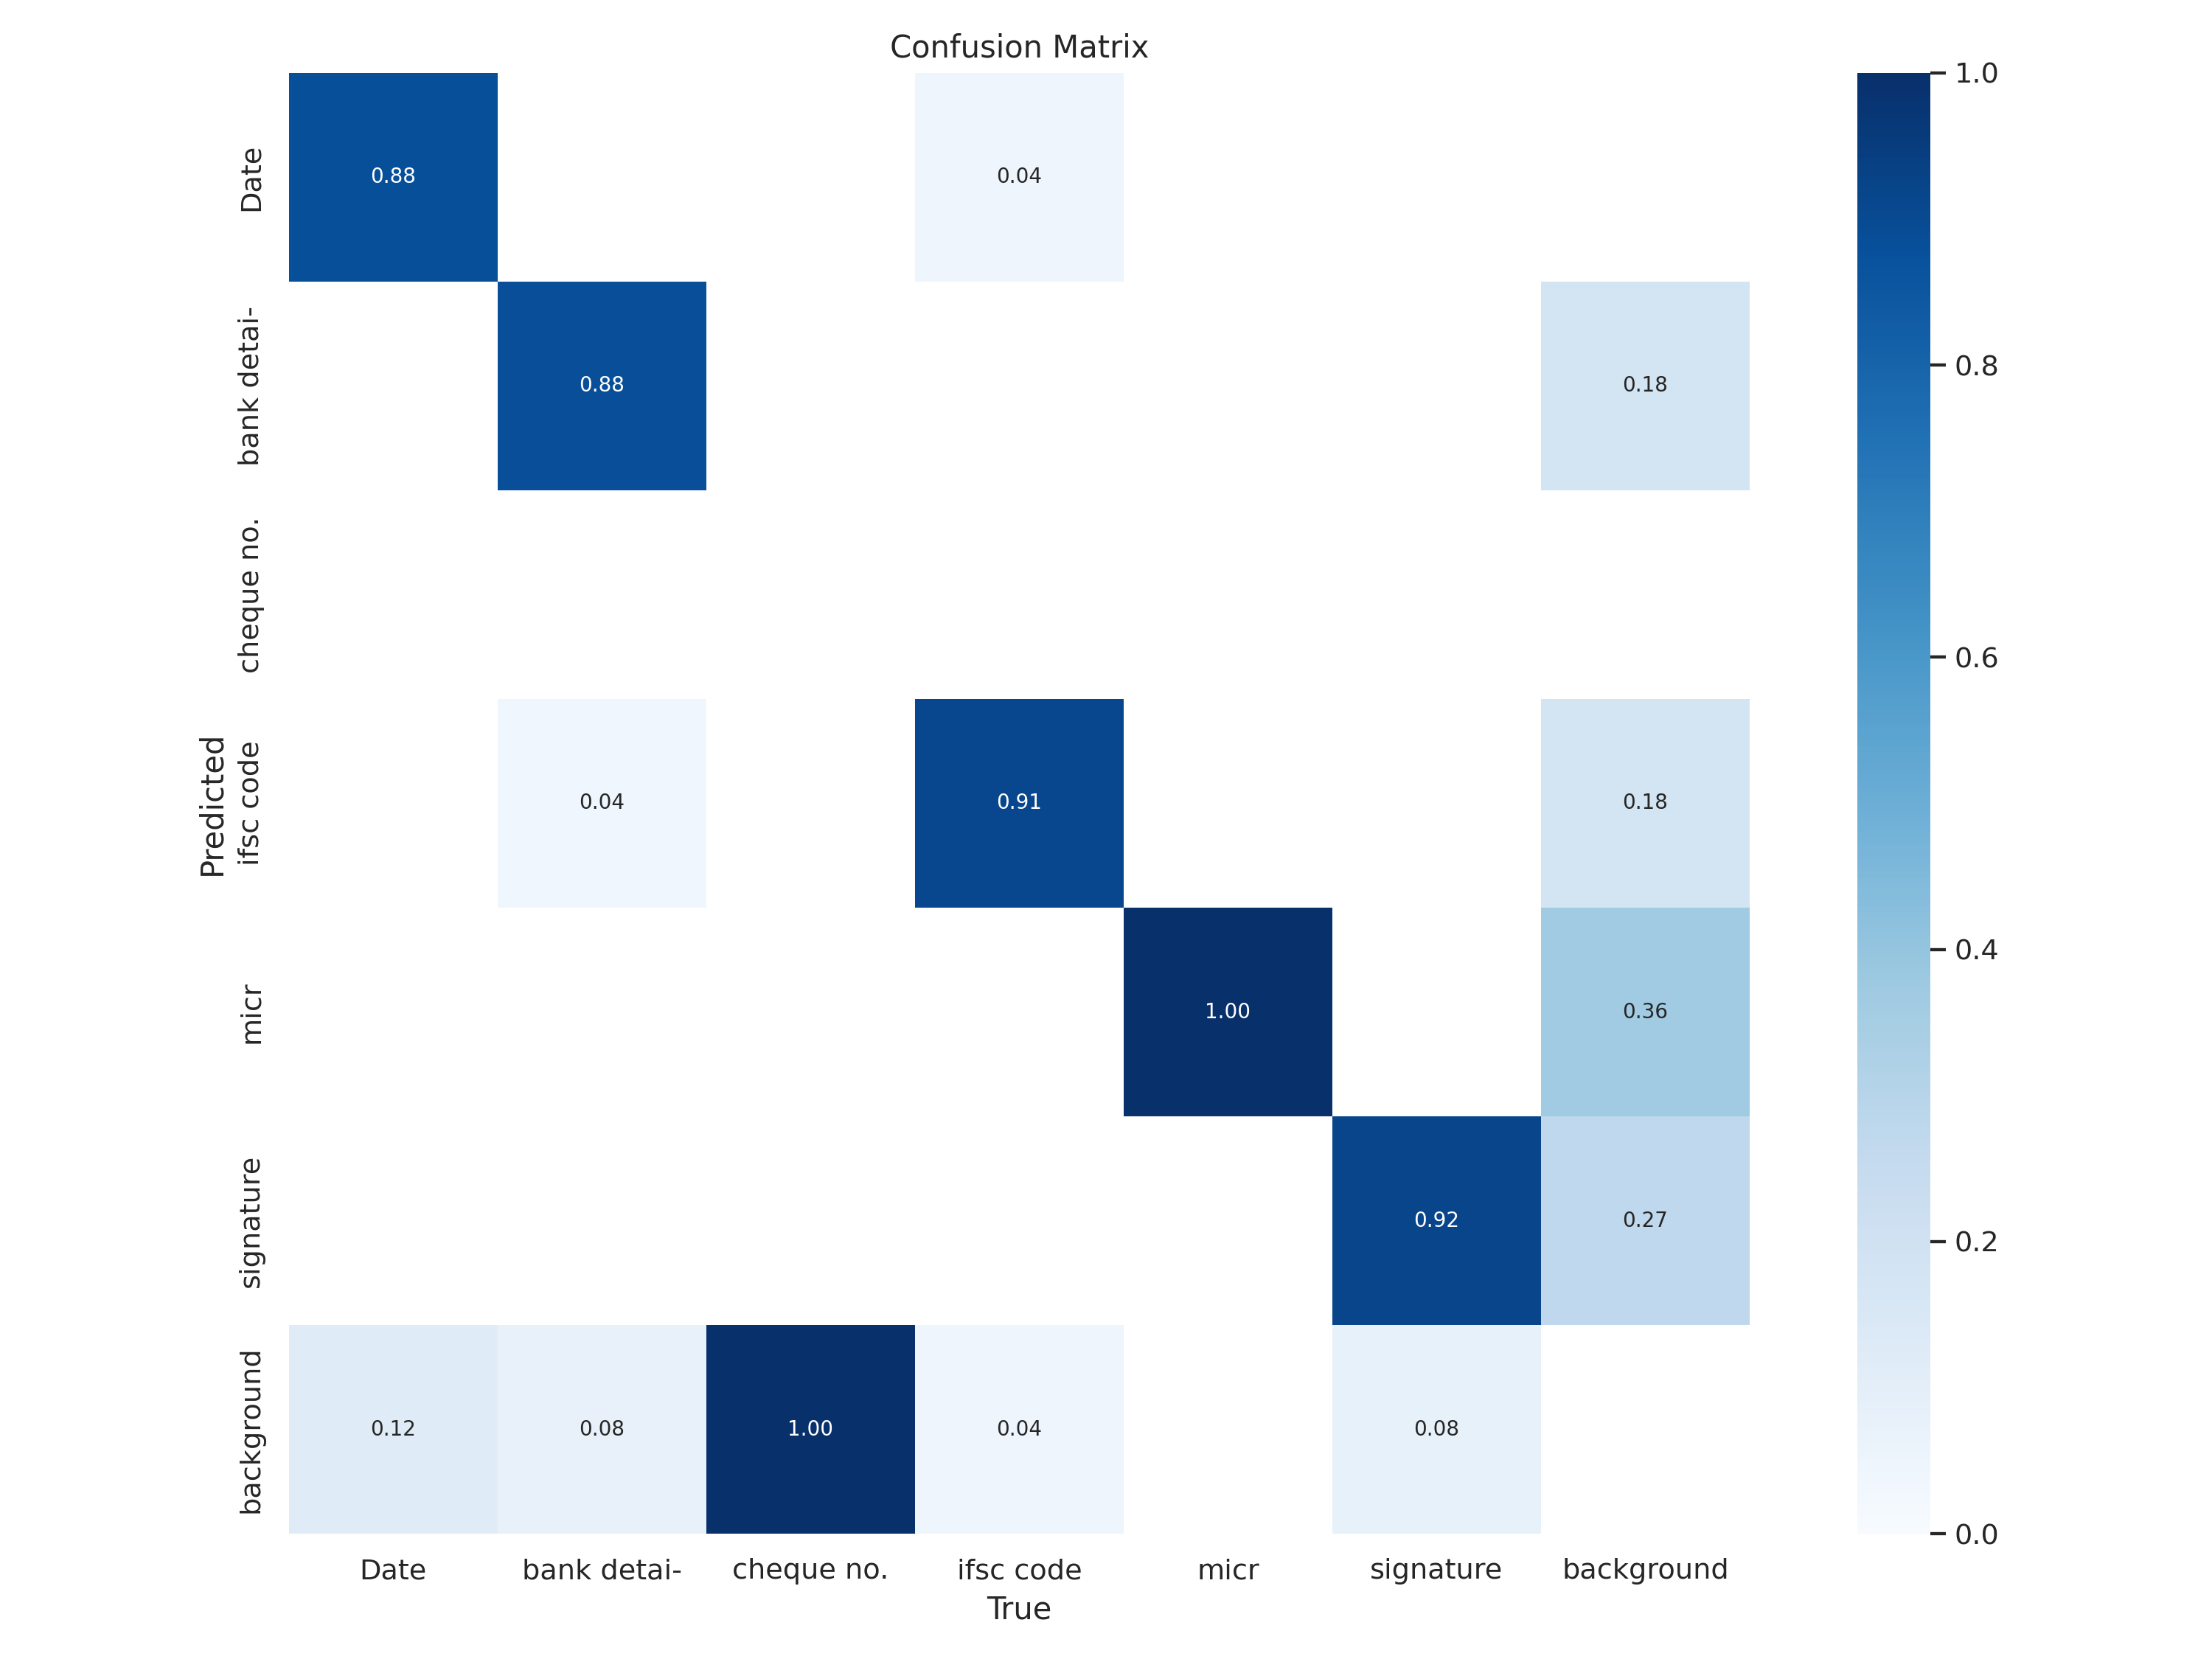

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


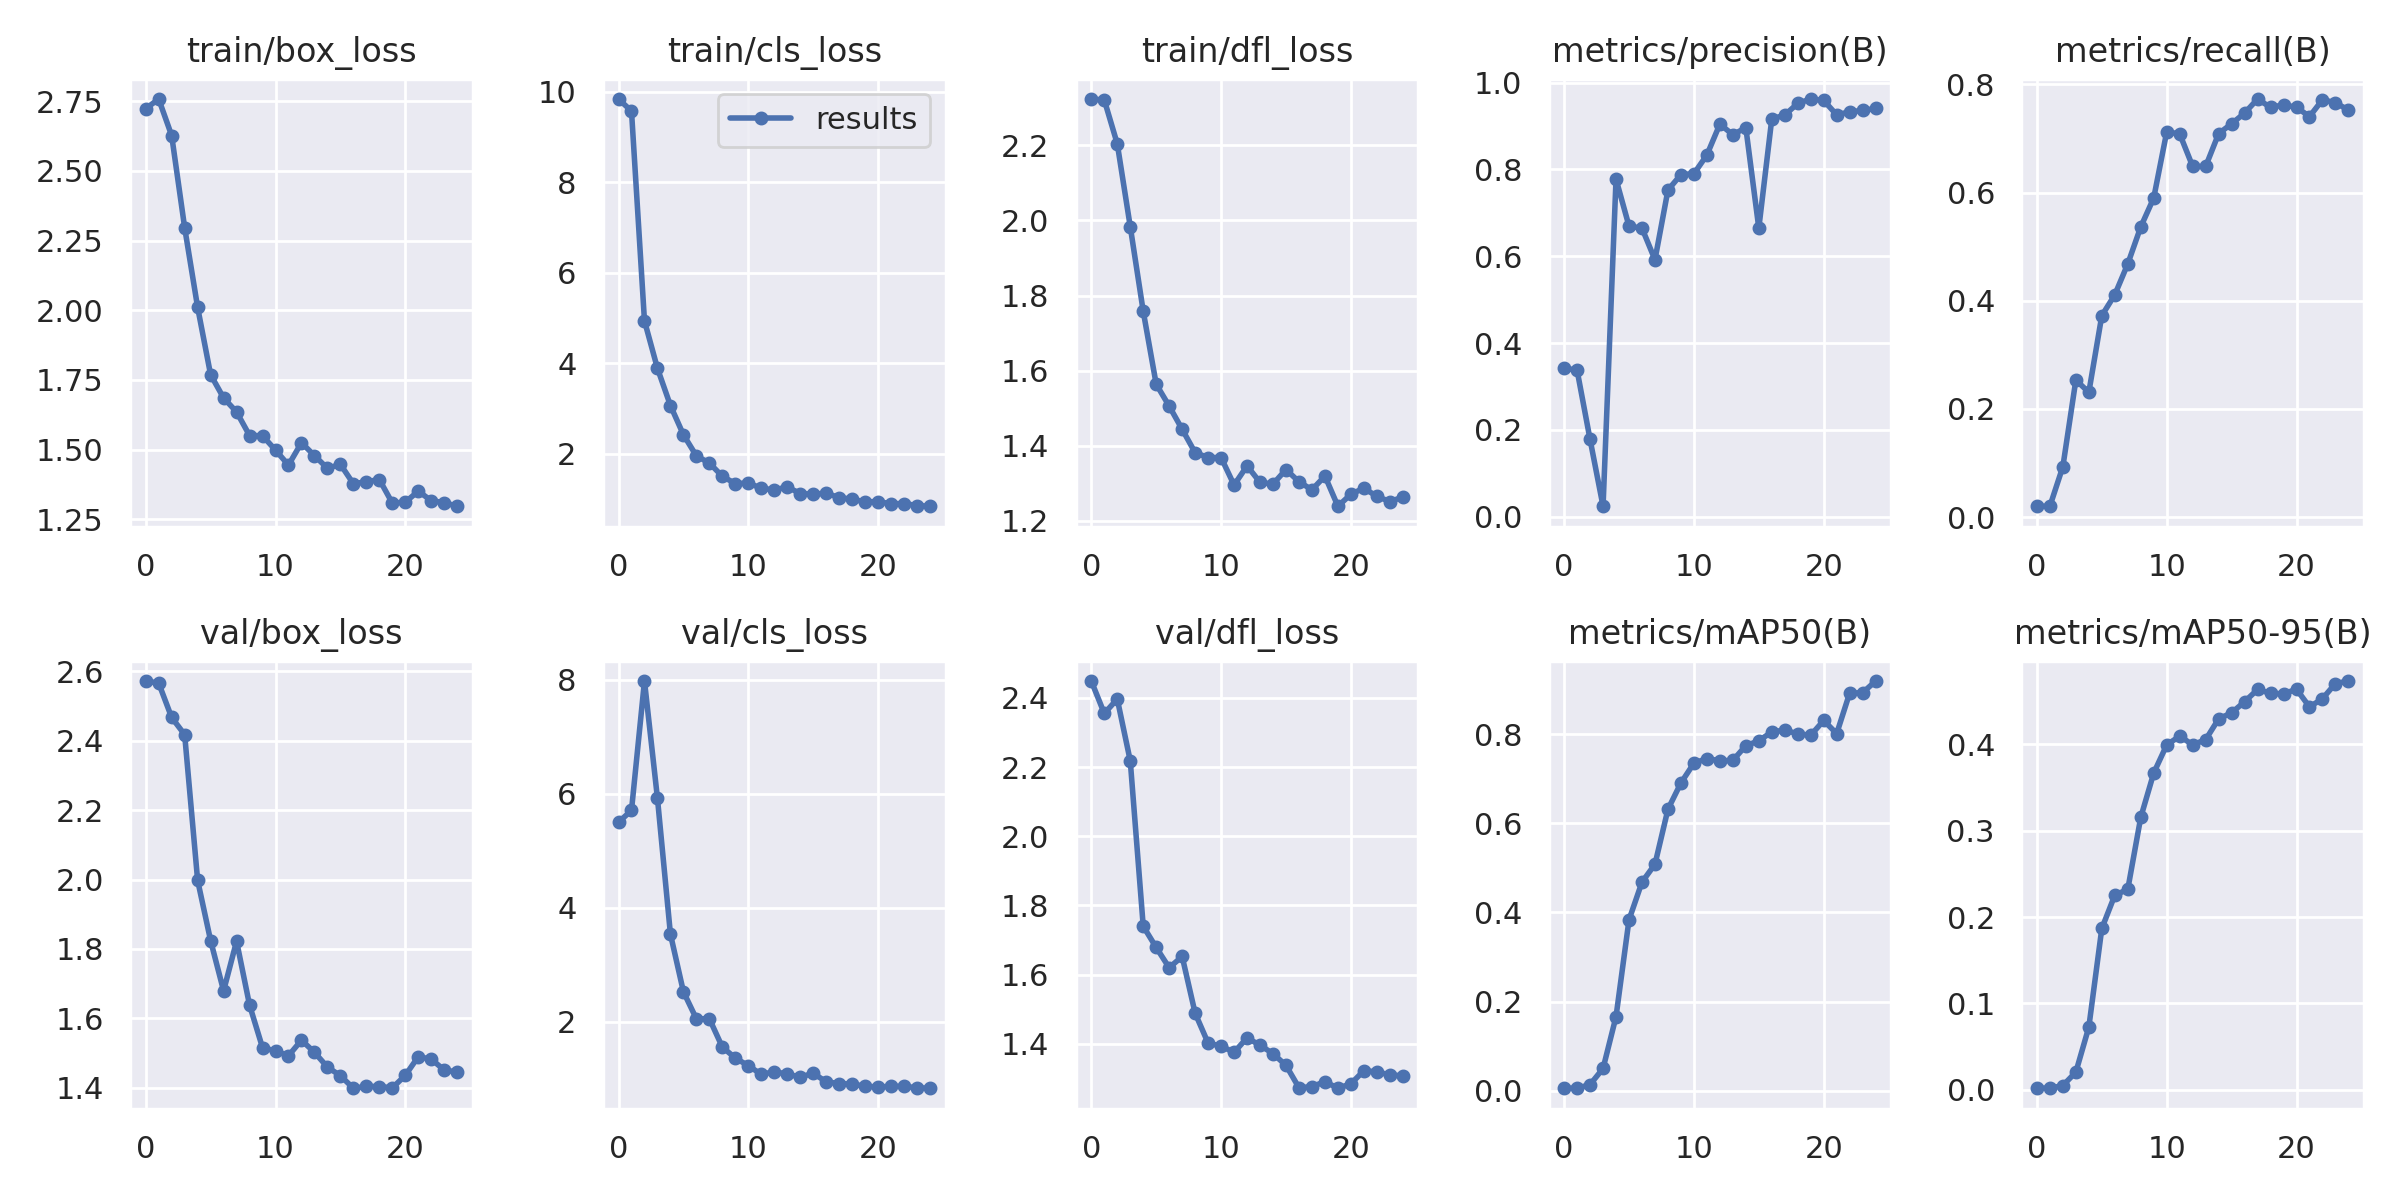

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


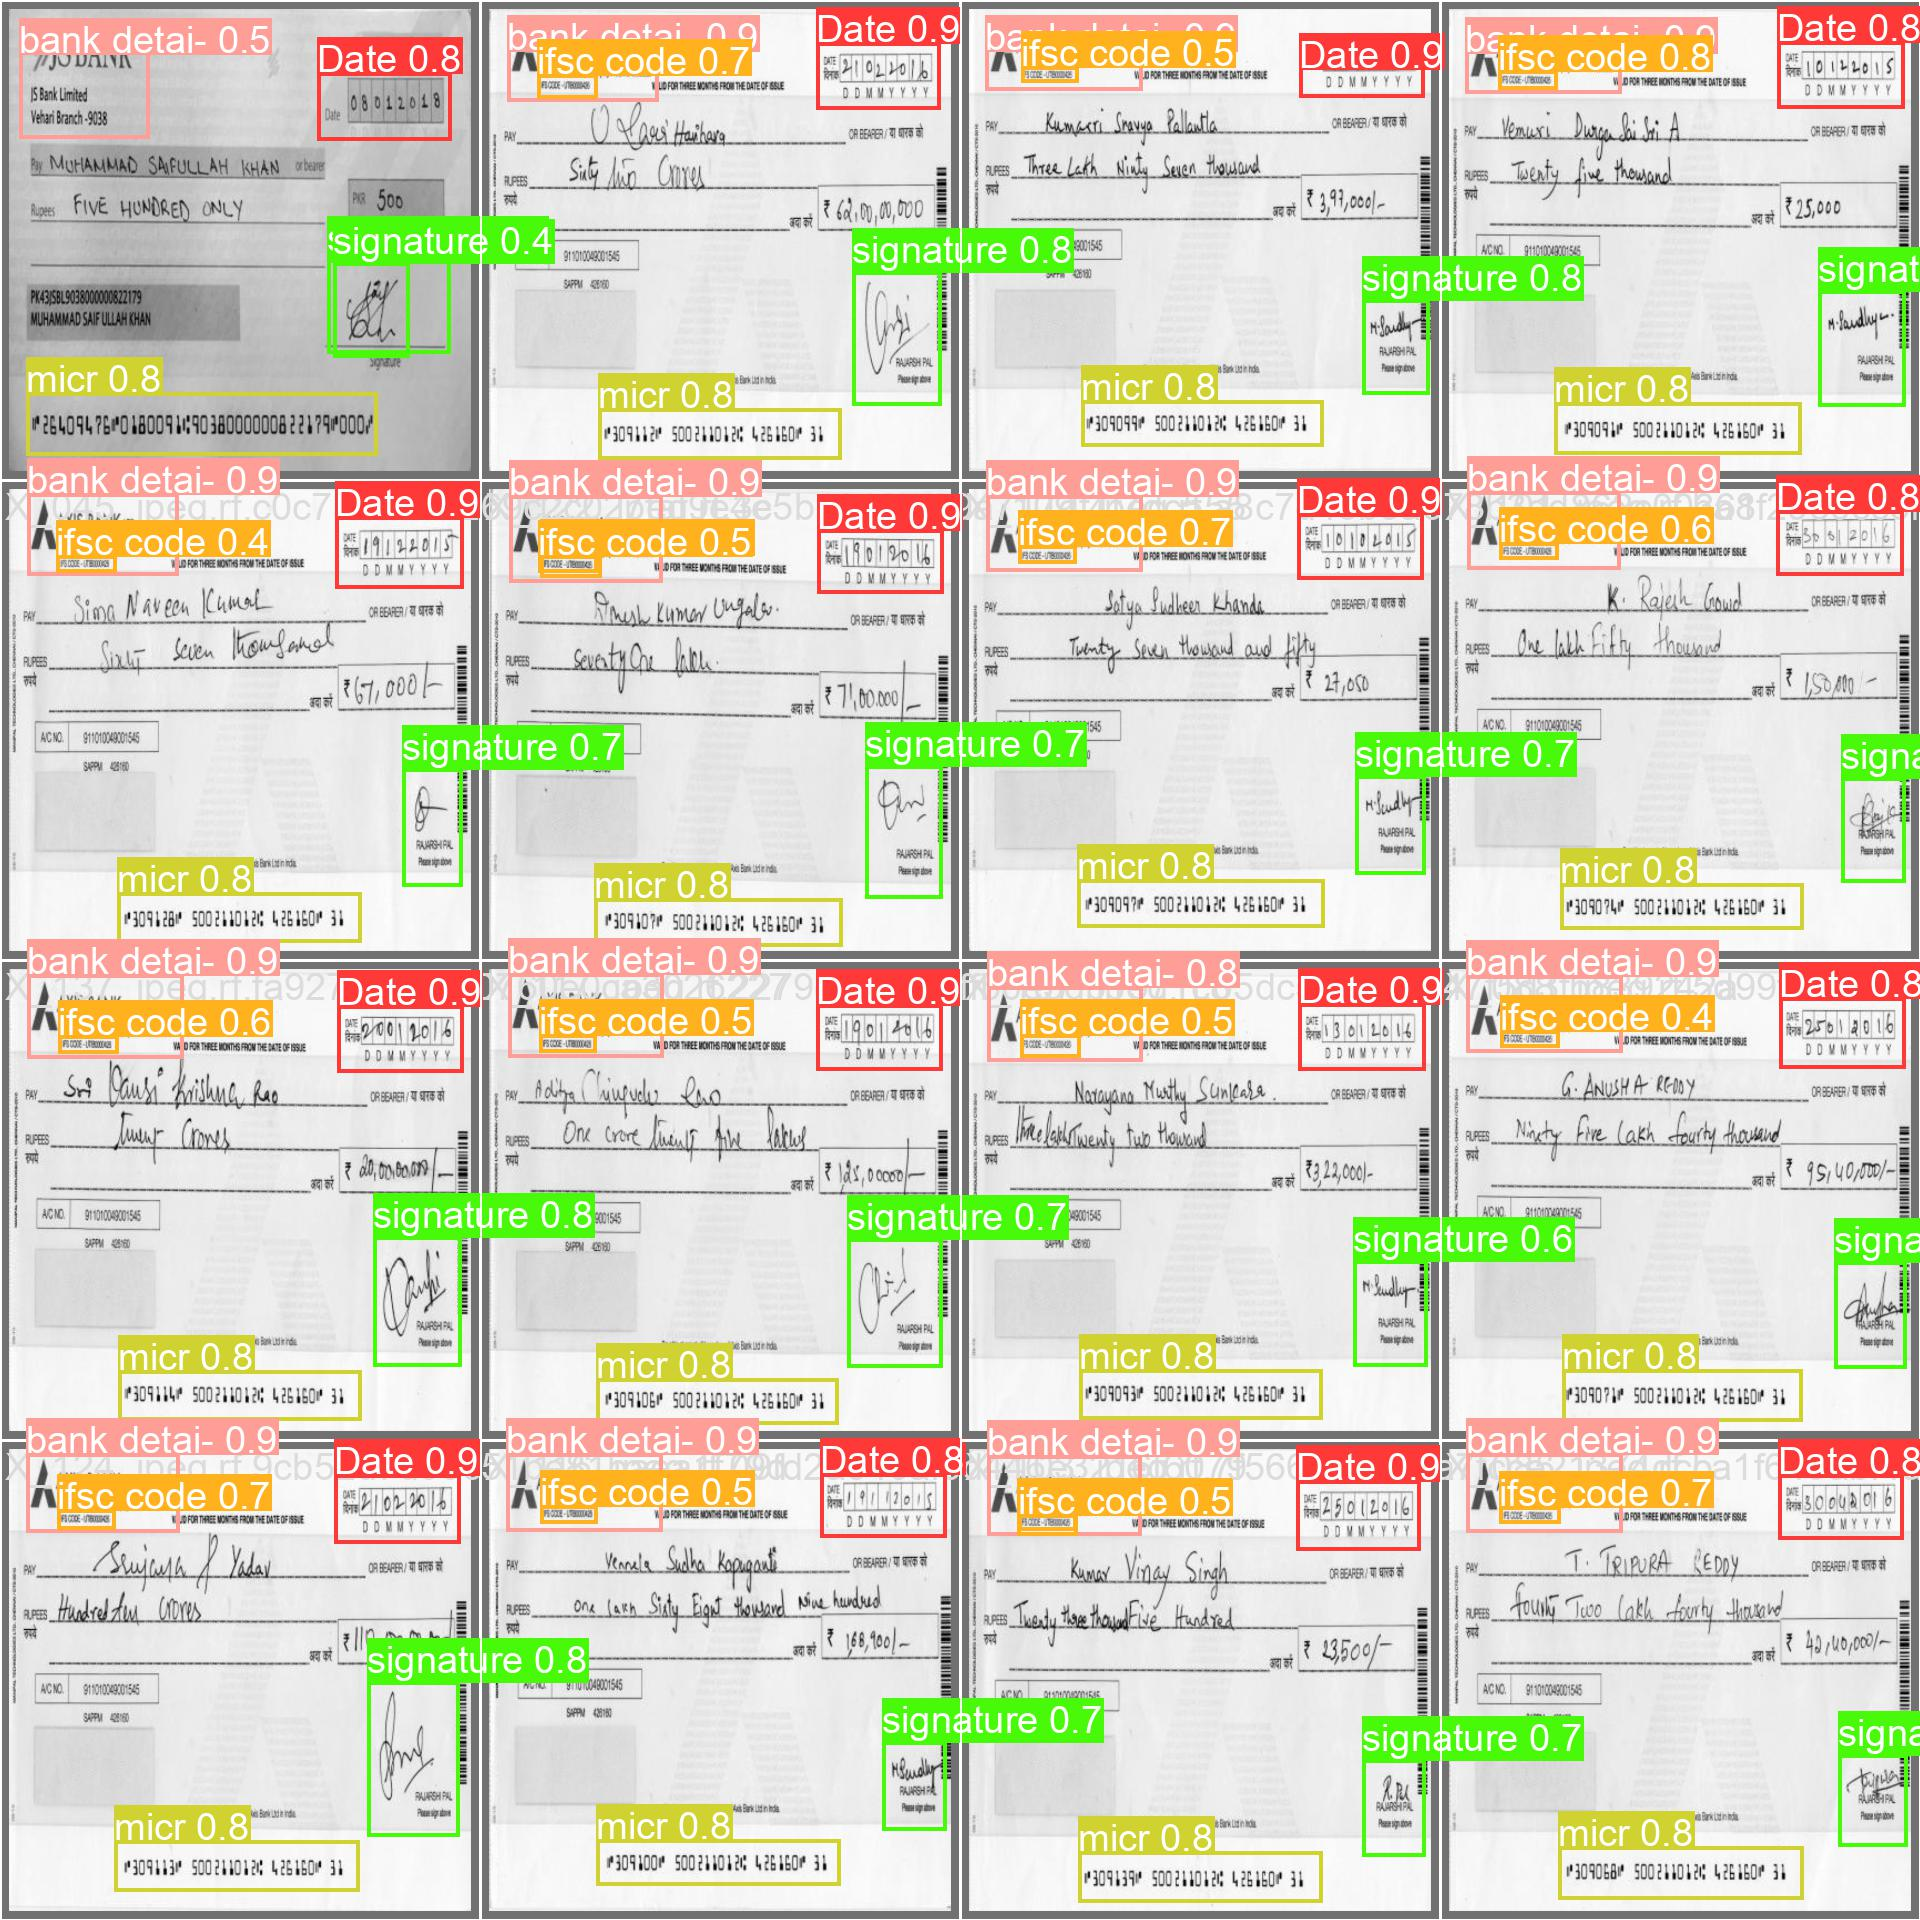

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-06-25 11:54:11.750810: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/cheque-1/valid/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100% 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.28it/s]
                   all         25        127      0.942      0.752      0.919      0.471
                  Date         25         25      0.979       0.92      0.928      0.577
           bank detai-         25         26      0.917      0.885       0.94      0.655
            cheque no.         25          3          1          0      0.806      0.235
             ifsc code         25         23       0.91       0.87      0.939      0.407
  

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.06 source={dataset.location}/test/images save=True

/content
2023-06-25 11:54:27.767575: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
image 1/14 /content/datasets/cheque-1/test/images/X_001_jpeg.rf.28180e9488537c7377731d89db33526a.jpg: 800x800 2 Dates, 1 bank detai-, 1 micr, 2 signatures, 24.1ms
image 2/14 /content/datasets/cheque-1/test/images/X_008_jpeg.rf.75e80160d1b7e64d28409c496bfeb0e2.jpg: 800x800 3 Dates, 2 bank detai-s, 2 micrs, 3 signatures, 24.2ms
image 3/14 /content/datasets/cheque-1/test/images/X_063_jpeg.rf.de8f32ce07485c66e21a68a4b0c645c1.jpg: 800x800 1 Date, 1 bank detai-, 2 cheque no.s, 1 ifsc code, 1 micr, 1 signature, 24.1ms
image 4/14 /content/datasets/cheque-1/test/images/X_071_jpeg.rf.fb6819c7463006cc59f8fc5676052bf9.jpg: 800x800 2 Dates, 1 bank detai-, 2 ifsc codes, 4 micrs, 1 signature, 24.1ms
image

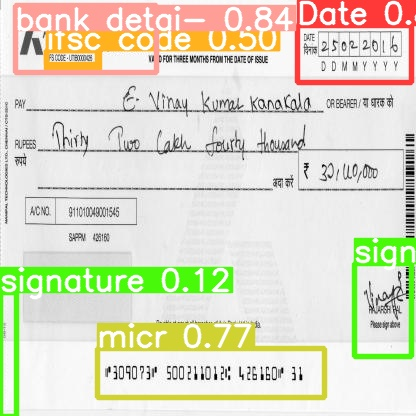

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/X_087_jpeg.rf.7a77dc782f5fe61125bfcd9718864db3.jpg')[:3]:
# for image_path in glob.glob(f'/content/cheque.png')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
# project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model
import torch

# Assuming you have the 'model' object
torch.save(model, 'model.pth')
#choose random test set image
import os, random
# test_set_loc = dataset.location + "/content/datasets/cheque-1/test"
# random_test_image = random.choice(os.listdir(test_set_loc))
random_test_image = "/content/datasets/cheque-1/test/images/X_087_jpeg.rf.7a77dc782f5fe61125bfcd9718864db3.jpg"
print("running inference on " + random_test_image)
pred = model.predict(random_test_image, confidence=6, overlap=30).json()
pred


running inference on /content/datasets/cheque-1/test/images/X_087_jpeg.rf.7a77dc782f5fe61125bfcd9718864db3.jpg


{'predictions': [{'x': 85.5,
   'y': 37.0,
   'width': 141.0,
   'height': 72.0,
   'confidence': 0.46491819620132446,
   'class': 'bank detai-',
   'image_path': '/content/datasets/cheque-1/test/images/X_087_jpeg.rf.7a77dc782f5fe61125bfcd9718864db3.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 356.0,
   'y': 50.5,
   'width': 114.0,
   'height': 63.0,
   'confidence': 0.24672293663024902,
   'class': 'Date',
   'image_path': '/content/datasets/cheque-1/test/images/X_087_jpeg.rf.7a77dc782f5fe61125bfcd9718864db3.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 211.0,
   'y': 373.0,
   'width': 220.0,
   'height': 44.0,
   'confidence': 0.13119736313819885,
   'class': 'micr',
   'image_path': '/content/datasets/cheque-1/test/images/X_087_jpeg.rf.7a77dc782f5fe61125bfcd9718864db3.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 384.0,
   'y': 308.0,
   'width': 58.0,
   'height': 82.0,
   'confidence': 0.0635901689529419,
   'class': 'signature',
   

In [ ]:
predictions = pred['predictions']

for prediction in predictions:
    x = prediction['x']
    y = prediction['y']
    width = prediction['width']
    height = prediction['height']
    class_label = prediction['class']
    confidence = prediction['confidence']

    x = int(x)
    y = int(y)
    width = int(width)
    height = int(height)

    print('Bounding Box:', (x, y, width, height))
    print('Confidence:', confidence)
    print('Class Label:', class_label)


    # print(f'x: {x}, y: {y}, width: {width}, height: {height}')


Bounding Box: (85, 37, 141, 72)
Confidence: 0.46491819620132446
Class Label: bank detai-
Bounding Box: (356, 50, 114, 63)
Confidence: 0.24672293663024902
Class Label: Date
Bounding Box: (211, 373, 220, 44)
Confidence: 0.13119736313819885
Class Label: micr
Bounding Box: (384, 308, 58, 82)
Confidence: 0.0635901689529419
Class Label: signature


In [ ]:
predictions = pred['predictions']

for prediction in predictions:
    x = prediction['x']
    y = prediction['y']
    width = prediction['width']
    height = prediction['height']
    class_label = prediction['class']
    confidence = prediction['confidence']

    x = int(x)
    y = int(y)
    width = int(width)
    height = int(height)

    print('Bounding Box:', (x, y, width, height))
    print('Confidence:', confidence)
    print('Class Label:', class_label)

    # Convert bounding box coordinates to (x1, y1, x2, y2) format
    bbox = xywh2xyxy(torch.tensor([x, y, width, height]))

    x1, y1, x2, y2 = bbox.tolist()

    # Draw bounding box on the image
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Write class label and confidence on the image
    label = f'{class_label}: {confidence:.2f}'
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image with bounding boxes and labels
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import torch
import numpy as np
from google.colab.patches import cv2_imshow

def xywh2xyxy(x):
    # """
    # Convert bounding box coordinates from (x, y, width, height) format to (x1, y1, x2, y2) format where (x1, y1) is the
    # top-left corner and (x2, y2) is the bottom-right corner.

    # Args:
    #     x (np.ndarray | torch.Tensor): The input bounding box coordinates in (x, y, width, height) format.
    # Returns:
    #     y (np.ndarray | torch.Tensor): The bounding box coordinates in (x1, y1, x2, y2) format.
    # """
    y = x.clone() if isinstance(x, torch.Tensor) else np.copy(x)
    y[..., 0] = x[..., 0] - x[..., 2] / 2  # top left x
    y[..., 1] = x[..., 1] - x[..., 3] / 2  # top left y
    y[..., 2] = x[..., 0] + x[..., 2] / 2  # bottom right x
    y[..., 3] = x[..., 1] + x[..., 3] / 2  # bottom right y
    return y

predictions = pred['predictions']

for prediction in predictions:
    x = prediction['x']
    y = prediction['y']
    width = prediction['width']
    height = prediction['height']
    class_label = prediction['class']
    confidence = prediction['confidence']

    x = int(x)
    y = int(y)
    width = int(width)
    height = int(height)

    print('Bounding Box:', (x, y, width, height))
    print('Confidence:', confidence)
    print('Class Label:', class_label)

    # Convert bounding box coordinates to (x1, y1, x2, y2) format
    bbox = xywh2xyxy(torch.tensor([x, y, width, height]))

    x1, y1, x2, y2 = bbox.tolist()

    # Draw bounding box on the image
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Crop the bounding box region

    if(class_label == 'micr'):
      crop = img[y1:y2, x1:x2]

    # Display the cropped image
      cv2_imshow(crop)
      cv2.waitKey(0)
      cv2.destroyAllWindows()
      print(pytesseract.image_to_string(crop,lang='eng'))

    label = f'{class_label}: {confidence:.2f}'
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image with bounding boxes and labels
print("")
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
